In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Track Orientations

In [ ]:
file = pd.read_csv('f1tenth_racetracks/BrandsHatch/BrandsHatch_centerline.csv')
file.columns = ['x', 'y', 'w_r', 'w_l']
file.index = file.index.astype(int)
map_centers = file.values[:, :2]
distance_between_centers = np.hstack([[0.],np.linalg.norm(map_centers[:-1,:]- map_centers[1:,:],axis=1)])

In [ ]:
def calculate_smooth_orientations_vectorized(track_centers, window_size=5):
    """
    Vectorized calculation of smoothed orientations for track traversal.
    
    Args:
        track_centers (np.ndarray): Shape (N, 2) array of track center points (x, y)
        window_size (int): Number of points to consider for smoothing
    
    Returns:
        np.ndarray: Shape (N,) array of orientation angles in radians
    """
    num_points = track_centers.shape[0]
    half_window = window_size // 2
    
    # Create indices for the future points (with wraparound)
    future_indices = (np.arange(num_points) + half_window) % num_points
    
    # Get the future points
    future_points = track_centers[future_indices]
    
    # Calculate direction vectors
    direction_vectors = future_points - track_centers
    
    # Calculate angles using arctan2
    orientations = np.arctan2(direction_vectors[:, 1], direction_vectors[:, 0])
    
    return orientations

In [ ]:
angles = calculate_smooth_orientations_vectorized(map_centers, window_size=5)
angles,len(angles)

In [ ]:
plt.plot(angles)

# Exponential Decay Reward Function

In [ ]:
func = lambda x,scale : (scale)*(1-2.5*x * np.exp(x/1.1))
x = np.arange(0,1,0.01)
y = func(x,1)
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
np.exp(2.2)

In [ ]:
distance_between_centers

In [ ]:
track_length = 914
initial = 913

In [ ]:
index = 0
diff = (index - initial) % track_length
diff

In [ ]:
a = [0, 0, 0.2, 0.123, 0.284,0,0,0,0,0,0.88]
# get indices of non zero values
non_zero_indices = np.where(np.array(a) != 0)[0]
non_zero_indices

In [ ]:
(256 + 1 ) % 257

In [ ]:
func = lambda x: -4.3 * np.exp(3 * (x - 0.52))

In [ ]:
angle = np.radians(270)
angle

In [ ]:
func(angle)

In [ ]:
1 - angle/0.52

In [5]:
np.radians(30)

0.5235987755982988

# Speed Reward

In [16]:
speeds = np.linspace(0.8,1.8,5)
mean_speed = np.mean(speeds)
std_speed = np.std(speeds)
speeds,mean_speed, std_speed

(array([0.8 , 1.05, 1.3 , 1.55, 1.8 ]), 1.3, 0.3535533905932738)

In [84]:
func = lambda x:  5 * ((1/np.sqrt(2*np.pi*std_speed**2 ) * np.exp(-0.5/(std_speed**2) * (x-mean_speed)**2)) - mean_speed/speeds[-1])

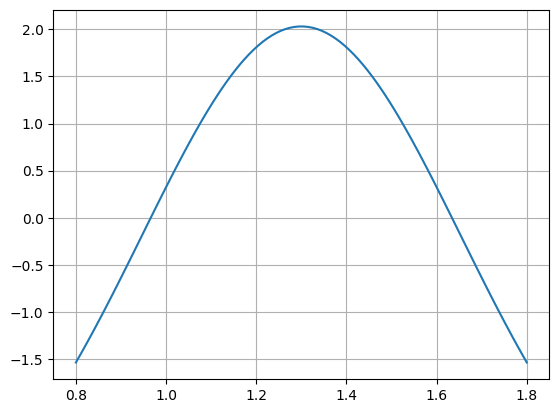

In [85]:
x = np.linspace(0.8,1.8,100)
y = func(x)
plt.plot(x,y)
plt.grid()
plt.show()

In [60]:
func(0.8)

0.4151074974205947